In [2]:
# Neural network is a network of equations
# neuron is an equation 'y=@1x1+....+@nxn' , each neuron has theta differ from the thetas in other neurons
# layer is a set of neurons
# Input layer take a feature from the data 'n features => n Neuron' 'one input'
# Input layer optimize the neuron giving first hidden layer
# First hidden layer 'several inputs ', n of inputs = n of features
# Only one neuron in the output layer in Regression and binary classification
# In multi classification : several number of neurons in the output layer 'n of neuron = n of classes'
# -1-There is a different ranges in the value of thetas : causes losting the effect of some features
# -2-Value of theta may increases by the number of layers 
# -3-Value of theta may decreases by the number of layers 
# Activation function solve the above three problems by filtering neurons
# Activation function examples: sigmoid '0=>1', soft max, tanh '-1=>1', linear 'it's range depends on the slop', relo '+ve as it is , -ve=>0'
# Regression + neural 'output layer activation function' : linear or relo 'if it is 100% +ve'
# Binary Classification + neural 'output layer activation function' : segmoid
# Multi Classification + neural 'output layer activation function' : soft max
# Do not use soft max in hidden layer , output layer only 
# No of layers between 2 to 10 
# No of neurons in layers preferable to be from 2s family 2,4,8,16,... => high accuracy and less processing time
# Grow fast , shrink slowly '64,512,128,64,32,8' , grow then shrink do not grow shrink grow shrink
#########################################
# 1- Building Neural network
# 2- Randamizing weights "0=>1" 'large no of thetas'
# 3- Calculating output using the current wieghts  ---> Forward Propagation
# 4- Cross function
# 5- updating layers ---> Back Propagation
# 3,4,5 repeated 
##########################
###to solve over fit happens 'after training and testing' 'over fit : large training accuracy , small testing accuracy'
# Drop out : disconnecting in some connections or neuron randomly , changes by every iteration'loop' 
# Epoch : how many times will you read the data 'never change the thetas', epoch inc, time inc, acc inc 
# Bach size : transpose the table'matrix' to decrease size & make baches'step = no of rows/bach size' bach decc,time inc, acc inc
# you can use large bach size and large epoch to get better acc and time
# Early stopping : stop when it finds that the testing accuracy started to decrease

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
data = pd.read_csv('Airline_Delay_Cause.csv')
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [6]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

In [9]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [10]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x > 100 else 0)
data['WDCase'].value_counts()

WDCase
0    215116
1    102152
Name: count, dtype: int64

In [11]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [12]:
X = data.drop(['WDCase'],axis=1)
y = data['WDCase']

In [13]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
318012    1
318013    1
318014    0
318015    0
318016    1
Name: WDCase, Length: 317268, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=44, shuffle=True)

print('X train shape is: ',X_train.shape)
print('X test shape is: ',X_test.shape)
print('Y train shape is: ',y_train.shape)
print('Y test shape is: ',y_test.shape)

X train shape is:  (237951, 17)
X test shape is:  (79317, 17)
Y train shape is:  (237951,)
Y test shape is:  (79317,)


In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
KerasModel = keras.models.Sequential([
    #keras.layers.Input(shape=(17)),#you can not write it 'better' , if written make sure it's true
    keras.layers.Dense(8, activation='tanh'),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='tanh'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
MyOptimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW")

KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy'])
##############loss######### metrics
# regression : mse ,           mse
# Binary classification : binary_crossentropy , accuracy
# Multiclassification : categorical_crossentropy , accuracy

In [19]:
history = KerasModel.fit(X_train,y_train,
                        validation_data=(X_test,y_test),
                        epochs=100,
                        batch_size=10000,
                        verbose=1,
                        callbacks=[tf.keras.callbacks.EarlyStopping(
                            patience = 10,
                            monitor = 'val_accuracy',  ##if regression => val_loss
                            restore_best_weights=True
                        )])

Epoch 1/100
24/24 [==============================] - 8s 70ms/step - loss: 0.5138 - accuracy: 0.7643 - val_loss: 0.4867 - val_accuracy: 0.7838
Epoch 2/100
24/24 [==============================] - 1s 47ms/step - loss: 0.4800 - accuracy: 0.7875 - val_loss: 0.4760 - val_accuracy: 0.7915
Epoch 3/100
24/24 [==============================] - 1s 44ms/step - loss: 0.4727 - accuracy: 0.7931 - val_loss: 0.4704 - val_accuracy: 0.7954
Epoch 4/100
24/24 [==============================] - 1s 36ms/step - loss: 0.4671 - accuracy: 0.7962 - val_loss: 0.4658 - val_accuracy: 0.7973
Epoch 5/100
24/24 [==============================] - 1s 40ms/step - loss: 0.4617 - accuracy: 0.7983 - val_loss: 0.4605 - val_accuracy: 0.8020
Epoch 6/100
24/24 [==============================] - 1s 36ms/step - loss: 0.4548 - accuracy: 0.8044 - val_loss: 0.4540 - val_accuracy: 0.8058
Epoch 7/100
24/24 [==============================] - 1s 28ms/step - loss: 0.4462 - accuracy: 0.8094 - val_loss: 0.4456 - val_accuracy: 0.8097
Epoch 

In [20]:
print(KerasModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
KerasModel.save('KerasModel.Model')

INFO:tensorflow:Assets written to: KerasModel.Model\assets


INFO:tensorflow:Assets written to: KerasModel.Model\assets


In [22]:
y_pred = KerasModel.predict(X_test)

print('Prediction shape is : ',format(y_pred.shape))
print('Prediction items are : ',format(y_pred[:5]))

2479/2479 [==============================] - 7s 3ms/step
Prediction shape is :  (79317, 1)
Prediction items are :  [[9.9823374e-01]
 [9.9823374e-01]
 [1.8563188e-04]
 [1.8563188e-04]
 [1.8563188e-04]]


In [23]:
 ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 [==============================] - 8s 3ms/step - loss: 0.0120 - accuracy: 0.9974
Model Loss is 0.012040856294333935
Model Accuracy is 0.9974406361579895


In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
history.history['accuracy']

[0.7642959952354431,
 0.7874982953071594,
 0.7931002378463745,
 0.7962143421173096,
 0.7982693910598755,
 0.8044429421424866,
 0.8093977570533752,
 0.8144954442977905,
 0.8223079442977905,
 0.8299649953842163,
 0.8347222805023193,
 0.8386684656143188,
 0.8450605273246765,
 0.8506373167037964,
 0.8592609167098999,
 0.8684518933296204,
 0.880063533782959,
 0.9101537466049194,
 0.9585545063018799,
 0.9875730872154236,
 0.9894683957099915,
 0.9906073212623596,
 0.9903761744499207,
 0.9928640723228455,
 0.9921622276306152,
 0.9910149574279785,
 0.9922211170196533,
 0.9936583638191223,
 0.9936877489089966,
 0.9936793446540833,
 0.9941752552986145,
 0.9940323829650879,
 0.9942761063575745,
 0.9945324659347534,
 0.9952259063720703,
 0.9949695467948914,
 0.9952385425567627,
 0.9958646893501282,
 0.9955242872238159,
 0.9955831170082092,
 0.9958058595657349,
 0.9959319233894348,
 0.9963311553001404,
 0.9939903616905212,
 0.993498682975769,
 0.9955621361732483,
 0.9964110255241394,
 0.996276557445

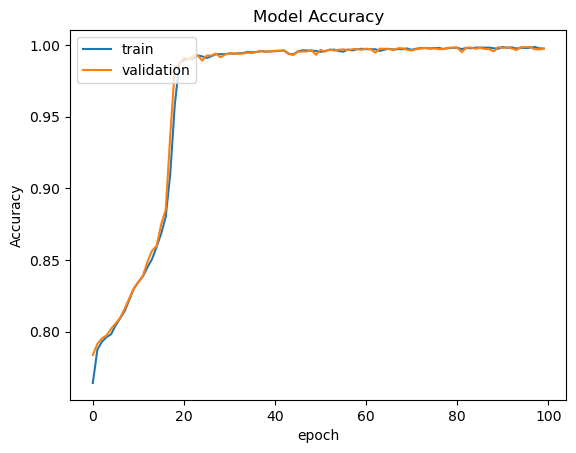

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

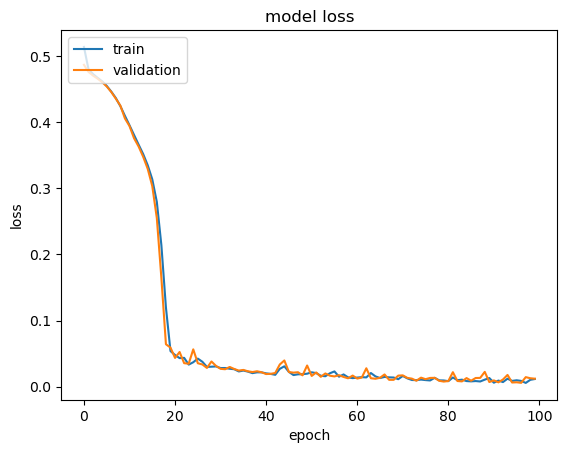

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

CM = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is :\n',CM)

Confusion Matrix is :
 [[53528   196]
 [    7 25586]]


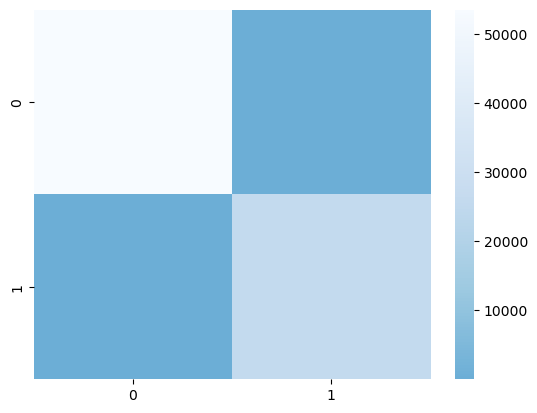

In [30]:
sns.heatmap(CM,center=True,cmap='Blues_r')
plt.show()

In [31]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       0.99      1.00      1.00     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317



In [32]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [33]:
def Value(x) : 
  if x <=30 : 
    return 0
  elif x <= 100 : 
    return 1
  elif x <= 200 : 
    return 2
  else : 
    return 3

data['WDCase'] = data['weather_delay'].apply(lambda x : Value(x))

In [34]:
data['WDCase'].value_counts()

WDCase
0    164988
3     68251
1     50128
2     33901
Name: count, dtype: int64

In [35]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [36]:
X = data.drop(['WDCase'],axis=1)
y = data['WDCase']

In [37]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: WDCase, Length: 317268, dtype: int64

In [38]:
y_cat =tf.keras.utils.to_categorical(y)  ## one hot encoding only used with neural network in multiclassification , else use label encoding
y,y_cat

(0         0
 1         0
 2         0
 3         1
 4         0
          ..
 318012    2
 318013    2
 318014    0
 318015    0
 318016    3
 Name: WDCase, Length: 317268, dtype: int64,
 array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.]], dtype=float32))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [40]:
KerasModel = keras.models.Sequential([
    #keras.layers.Input(shape=(17)),#you can not write it 'better' , if written make sure it's true
    keras.layers.Dense(8, activation='tanh'),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='tanh'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')
])

In [41]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
history = KerasModel.fit(X_train,y_train,
                        validation_data=(X_test,y_test),
                        epochs=100,
                        batch_size=10000,
                        verbose=1,
                        callbacks=[tf.keras.callbacks.EarlyStopping(
                            patience = 10,
                            monitor = 'val_accuracy',  ##if regression => val_loss
                            restore_best_weights=True
                        )])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [ ]:
y_cat = tf.keras.utils.to_categorical(y)

In [ ]:
y_cat

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

In [ ]:
print(KerasModel.summary())

In [ ]:
KerasModel.save('KerasModel.Model')

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

In [ ]:
ModelLoss , ModelAccuracy = KerasModel.evaluate(X_test,y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model accuracy is : {}'.format(ModelAccuracy))

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
data

In [ ]:
X = data.drop(['arr_flights'],axis=1)
y = data['arr_flights']

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'linear'),
        ])

In [ ]:
KerasModel.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)])

In [ ]:
print(KerasModel.summary())

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [ ]:
print('Mean absolute error is : ',mean_absolute_error(y_test,y_pred))
print('Mean squared error is : ',mean_squared_error(y_test,y_pred))
print('Median absolute error is : ',median_absolute_error(y_test,y_pred))
print('R2 score is : ',r2_score(y_test,y_pred))